In [126]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [282]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

np.set_printoptions(suppress=True)

In [128]:
%matplotlib inline

In [375]:
from initializations import (
    initialize_agents,
    initialize_beacons
)

from influences import (
    rotation_influence,
    position_influence,
    alignment_influence,
    cohesion_influence
)

from simulations import (
    look_at_beacon,
    move_to_beacon,
    look_with_neighbors,
    move_with_neighbors,
    individual_motion,
    collective_motion,
    motion_simulation
)

from diagnostics import (
    inspect_simulation,
    inspect_rotation_influence,
    inspect_position_influence,
    inspect_alignment_influence,
    inspect_cohesion_influence
)

In [376]:
agent_pos, agent_rot = initialize_agents(num_agents=24)
beacon_pos = initialize_beacons(room_sensing_range=20., num_beacons=12)

agent_rot

array([[ 3.0319135 ],
       [ 2.2910976 ],
       [-3.1334174 ],
       [ 2.7683303 ],
       [-1.6019943 ],
       [ 1.8961043 ],
       [ 1.3763252 ],
       [ 1.1480345 ],
       [-0.16226195],
       [ 1.2654471 ],
       [ 2.30889   ],
       [-0.05020729],
       [ 2.7437956 ],
       [-2.783351  ],
       [-0.5249776 ],
       [-2.7736416 ],
       [ 2.2655587 ],
       [-0.706422  ],
       [-2.2364175 ],
       [-1.70928   ],
       [-2.6923358 ],
       [-3.1027412 ],
       [-1.4964471 ],
       [ 2.037789  ]], dtype=float32)

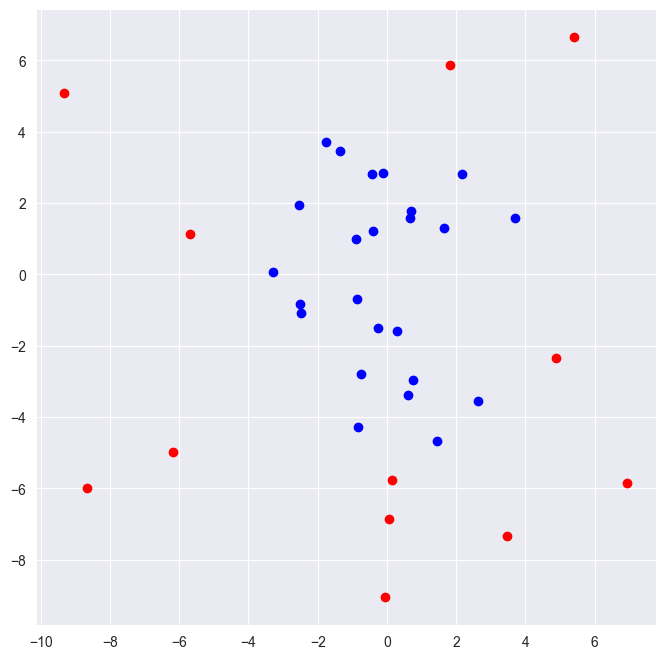

In [377]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(agent_pos[:,0], agent_pos[:,1], color='blue')
ax.scatter(beacon_pos[:,0], beacon_pos[:,1], color='red')

In [378]:
sim = motion_simulation(timesteps=300)

### Full simulation

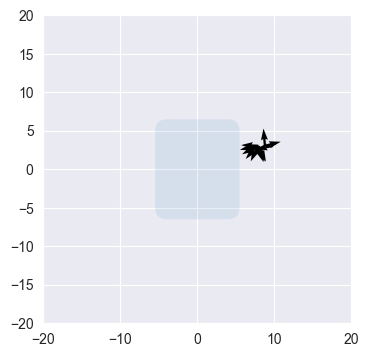

In [50]:
a = inspect_simulation(sim)
a.save('./../media/gif/animation.gif', writer=PillowWriter(fps=30))

### Rotation

Simulation of individual influences are unbounded in the test

In [379]:
ext_rotation = rotation_influence(agent_pos[0], agent_rot[0], beacon_pos[0])
ext_rotation

1.206280719357604

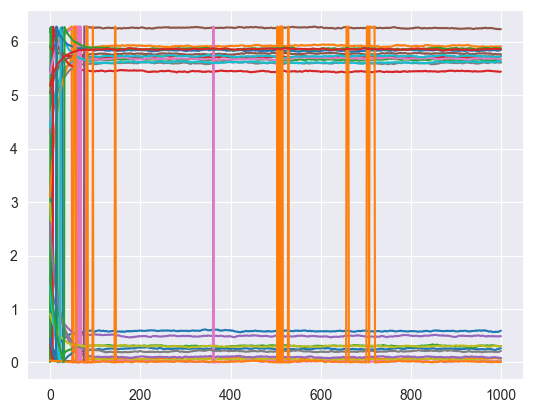

In [380]:
for i in range(len(agent_pos)):
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[-1], noise=0.2)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))

In [ ]:
a = inspect_rotation_influence(ext_rotation_sim, agent_pos[-1], beacon_pos[-1])
a.save('./../media/gif/rotation1.gif', writer=PillowWriter(fps=10))

### Position

In [229]:
p_influence = position_influence(agent_pos[-1], beacon_pos[-1], noise=0.1)

direction = np.arctan2(beacon_pos[-1, 1] - agent_pos[-1, 1], beacon_pos[-1, 0] - agent_pos[-1, 0])

print(p_influence, direction)

-0.7261539580767333 -0.7144756


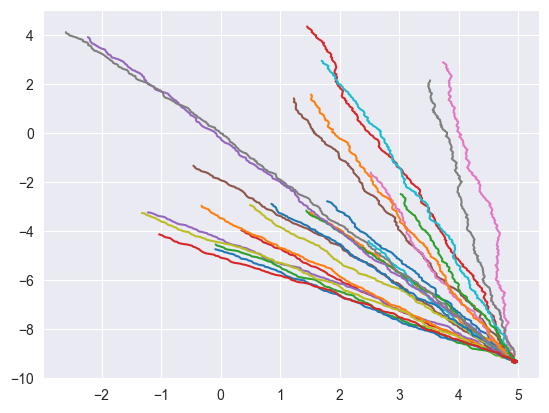

In [230]:
for i in range(len(agent_pos)):
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[-1], noise=1.)
    plt.plot(ext_position_sim[:,0], ext_position_sim[:,1])

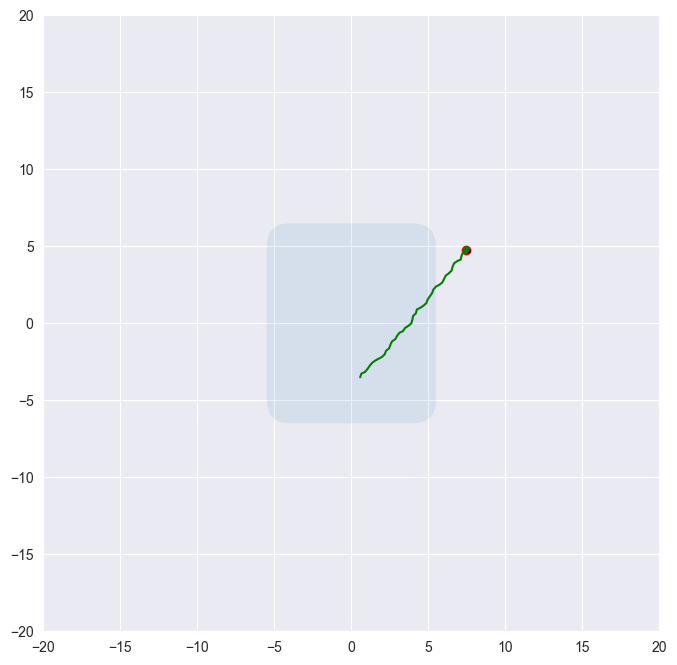

In [97]:
position_sim = move_to_beacon(agent_pos[-1], beacon_pos[-1], dt=0.5, timesteps=100, noise=1.)
b = inspect_position_influence(position_sim, beacon_pos[-1])
b.save('./../media/gif/position1.gif', writer=PillowWriter(fps=10))

### Alignment

In [362]:
al_influence = alignment_influence(agent_pos[2], agent_pos, agent_rot)
al_influence

-0.4115236434807092

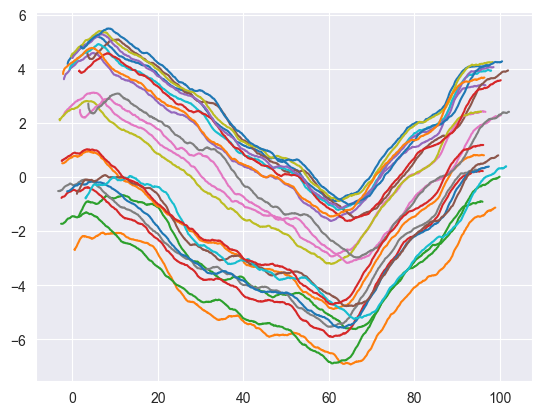

In [370]:
alignment_sim = look_with_neighbors(agent_pos, agent_rot, sensing_radius=2.5, noise=0.25)
for i in range(len(agent_pos)):
    plt.plot(alignment_sim[:,i,0], alignment_sim[:,i,1])

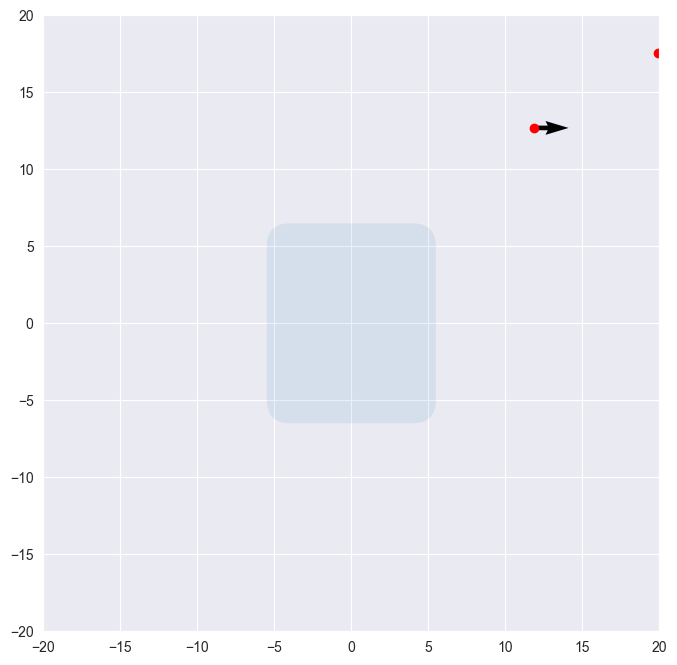

In [366]:
al = inspect_alignment_influence(alignment_sim)

al.save('./../media/gif/alignment1.gif', writer=PillowWriter(fps=10))

### Cohesion

In [354]:
co_influence = cohesion_influence(agent_pos[6], agent_pos, sensing_radius=1.5)
co_influence

2.2831666469573975

[-1.9900651  2.3058896]
[-0.4881926   0.56526109]
[-0.4881926   0.56526109]


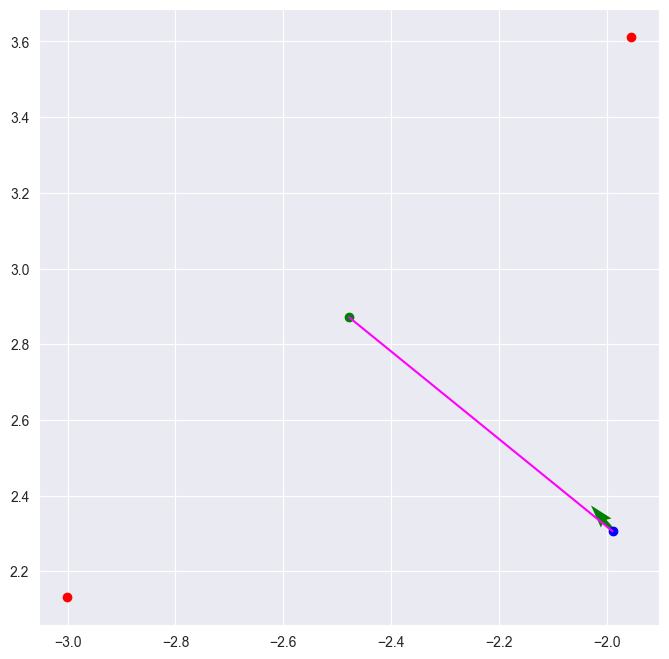

In [355]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

self = agent_pos[6]
print(self)
neighbors = np.array([[-1.9559693,  3.6110234], [-3.000546, 2.131278]])
average = np.array([-2.4782577, 2.8711507])
corrected = np.array([-0.4881926,  0.56526109])

twopoints = np.array([self, average])
print(corrected)
print(average - self)

ax.scatter(neighbors[:,0], neighbors[:,1], color='red')
ax.scatter(average[0], average[1], color='green')
ax.quiver(self[0], self[1], corrected[0], corrected[1], color='green')
ax.scatter(self[0], self[1], color='blue')
ax.plot(twopoints[:,0], twopoints[:,1], color='magenta')

In [359]:
cohesion_sim = move_with_neighbors(agent_pos, sensing_radius=1., noise=1.)
cohesion_sim

array([[[-1.0834804 ,  4.172098  ],
        [ 0.49261427, -2.681563  ],
        [ 1.4635949 , -1.4726013 ],
        ...,
        [-2.1574912 ,  3.8025331 ],
        [ 3.2154574 , -4.7929816 ],
        [-2.480197  ,  0.59323967]],

       [[-1.0835906 ,  4.1220984 ],
        [ 0.49261427, -2.681563  ],
        [ 1.4308689 , -1.4347991 ],
        ...,
        [-2.1294107 ,  3.761163  ],
        [ 3.2154574 , -4.7929816 ],
        [-2.4302108 ,  0.59441346]],

       [[-1.081338  ,  4.0721493 ],
        [ 0.49261427, -2.681563  ],
        [ 1.3985809 , -1.396622  ],
        ...,
        [-2.1006196 ,  3.7202845 ],
        [ 3.2154574 , -4.7929816 ],
        [-2.383295  ,  0.5771241 ]],

       ...,

       [[-0.00519797,  0.03184265],
        [ 0.49261427, -2.681563  ],
        [-0.01569273,  0.01490053],
        ...,
        [-0.01921691,  0.00800024],
        [ 3.2154574 , -4.7929816 ],
        [-0.03069866, -0.0053846 ]],

       [[-0.01948519, -0.01607264],
        [ 0.49261427, -2.68

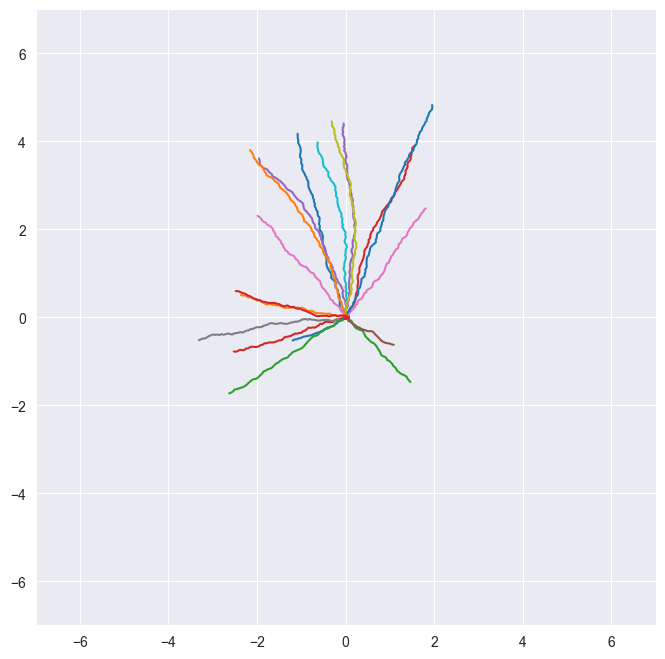

In [360]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(cohesion_sim[:,i,0], cohesion_sim[:,i,1])

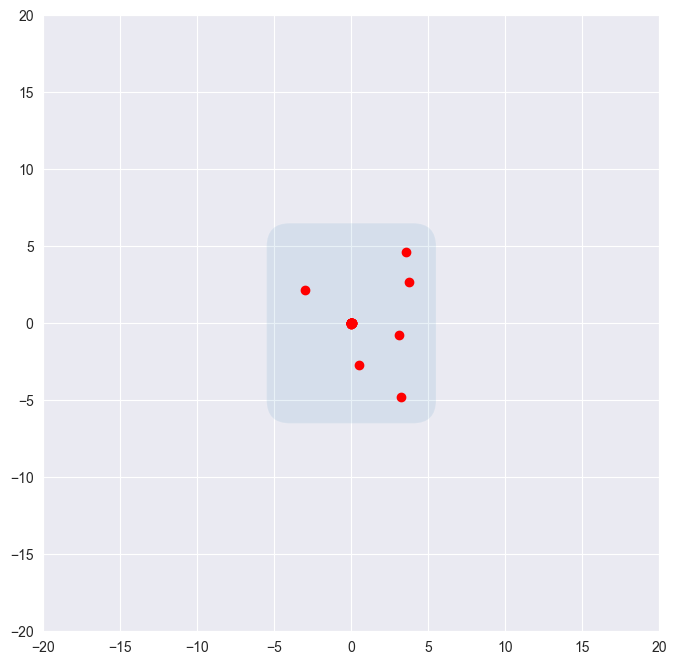

In [374]:
co = inspect_cohesion_influence(cohesion_sim)

co.save('./../media/gif/cohesion1.gif', writer=PillowWriter(fps=10))